# Import Libraries


In [1]:
!python --version

Python 3.12.12


In [2]:
!pip install numpy
!pip install pandas
!pip install wordcloud
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install scikit-plot
!pip install scipy==1.16.3

In [3]:
!pip install --upgrade scikit-plot scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
!pip install scikit-plot --upgrade

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud # Tạo hình ảnh wordCloud
from wordcloud import STOPWORDS # Danh sách các stopword được xác định trước
import nltk # Xử lí ngôn ngữ tự nhiên
from sklearn.metrics import roc_curve # Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import auc # Tính diện tích dưới ROC curve (AUC)
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị và trực quan hóa
import seaborn as sns # Thư viện trực quan hóa dữ liệu thống kê

# Fix for ImportError: cannot import name 'interp' from 'scipy'
# scipy.interp was deprecated and removed; scikit-plot v0.3.7 still tries to import it.
import scipy
scipy.interp = np.interp # Use numpy's interp function as a patch

import scikitplot as skplt
from sklearn.model_selection import train_test_split # Chia tập dữ liệu thành các tập con để đào tạo và kiểm tra
# from scipy import interp # Removed, as it causes ImportError and numpy.interp should be used instead

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# CountVectorizer - Chuyển văn bản thành ma trận đếm token
# TfidfTransformer - Chuyển ma trận đếm thành biểu diễn TF hoặc TF-IDF chuẩn hóa

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# accuracy_score - Tính toán độ chính xác
# confusion_matrix - Ma trận nhầm lẫn
# classification_report -Báo cáo hiển thị các chỉ số chính của phân loại

# Import machine learning algorithms
from sklearn.naive_bayes import MultinomialNB # Bộ phân loại Naive Bayes
from sklearn import svm # Support Vector Machines (SVM)
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
import os # Tương tác với hệ thống tập tin
from collections import Counter # Đếm số lượng đối tượng
import re # Thư viện biểu thức chính quy (regex)
from nltk.corpus import stopwords # Tập stopword có sẵn
from tqdm.auto import tqdm # Hiển thị thanh tiến trình
from nltk.stem import PorterStemmer, WordNetLemmatizer # Bộ giảm từ (stemming, lemmatization)
from nltk.tokenize import word_tokenize # Chia văn bản thành các từ
from wordcloud import WordCloud, STOPWORDS # Tạo word cloud, tập stopword
import pickle # Lưu và tải dữ liệu nhị phân

from sklearn.preprocessing import MinMaxScaler #Chuẩn hóa dữ liệu theo Min-Max
from scipy.sparse import hstack # Nối ma trận sparse theo chiều ngang
from sklearn.ensemble import VotingClassifier # Bộ phân loại bỏ phiếu (voting)
from sklearn.model_selection import GridSearchCV # Tìm kiếm lưới (Grid search) cho hyperparameter
from sklearn.ensemble import StackingClassifier # Bộ phân loại Stacking
from sklearn.linear_model import LogisticRegression # Hồi quy logistic

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
interp = np.interp

# Data Loading


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spam_Email_Detection/spam.csv", encoding='ISO-8859-1')

# Data First View



In [10]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# Dataset Rows & Columns count

In [11]:
# Số hàng và số cột của tập dữ liệu
# Kiểm tra số lượng hàng và cột trong tập dữ liệu bằng thuộc tính shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [12]:
# Thông tin về tập dữ liệu
# Kiểm tra thông tin chi tiết về tập dữ liệu bằng phương thức info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Duplicate Values

In [14]:
# Đếm số giá trị trùng lặp trong tập dữ liệu
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [15]:
# Xóa các giá trị trùng lặp
df['v2'].drop_duplicates(inplace=True)


In [16]:
# Xóa tất cả các cột không có tên (chứa nhiều giá trị bị thiếu)
df.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace=True)


In [17]:
# Đổi tên các cột v1 và v2 thành Label và Message
df.rename(columns={"v1": "Label", "v2": "Message"}, inplace=True)


In [18]:
# Tổng số lượng tin nhắn Spam và Không Spam
df['Label'].value_counts()


,count
Label,
ham,4825
spam,747


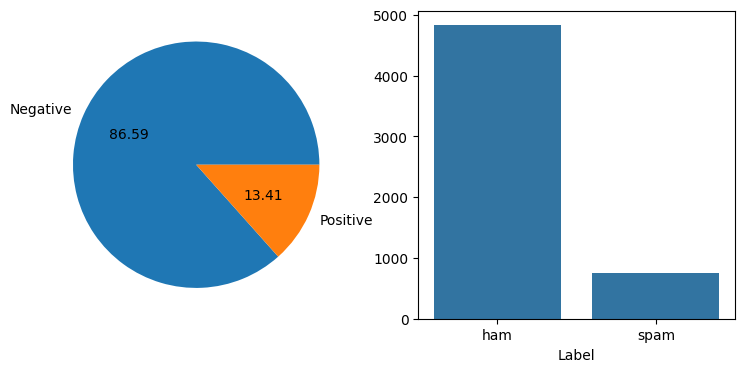

In [19]:
plt.figure(figsize=(9, 4))

# Biểu đồ tròn (Pie chart)
plt.subplot(1, 2, 1)
plt.pie(df['Label'].value_counts(), labels=['Negative', 'Positive'], autopct="%0.2f")
# labels: tên hiển thị cho từng phần (“Negative” và “Positive”)
# autopct: định dạng phần trăm hiển thị

# Biểu đồ cột (Bar plot)
plt.subplot(1, 2, 2)
label_counts = df['Label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.show()


#Data Wrangling


In [20]:
# Tạo một cột nhị phân 'Spam': giá trị 1 cho 'spam' và 0 cho 'ham', dựa trên cột 'Label'
df['Spam'] = df['Label'].apply(lambda x: 1 if x == 'spam' else 0)


In [21]:
# Thêm các đặc trưng (features) mới

# 1. Tổng số ký tự trong tin nhắn
df['Num_Char'] = df['Message'].apply(len)

# 2. Tổng số từ trong tin nhắn
df['Num_Word'] = df['Message'].apply(lambda x: len(str(x).split()))

# 3. Tổng số câu trong tin nhắn
df['Num_Sen'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [22]:
df.head(10)

,Label,Message,Spam,Num_Char,Num_Word,Num_Sen
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20,2
1,ham,Ok lar... Joking wif u oni...,0,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,2
3,ham,U dun say so early hor... U c already then say...,0,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,32,4
6,ham,Even my brother is not like to speak with me. ...,0,77,16,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,26,2
8,spam,WINNER!! As a valued network customer you have...,1,158,26,5
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,29,3


In [23]:
# Thông tin thống kê mô tả về tập dữ liệu
df.describe()


,Spam,Num_Char,Num_Word,Num_Sen
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,15.494436,1.996411
std,0.340751,59.690841,11.329427,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,61.000000,12.000000,1.500000
75%,0.000000,121.000000,23.000000,2.000000
max,1.000000,910.000000,171.000000,38.000000


In [24]:
df[df['Label']=='ham'].describe()

,Spam,Num_Char,Num_Word,Num_Sen
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,14.200622,1.837720
std,0.0,58.016023,11.424511,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,7.000000,1.000000
50%,0.0,52.000000,11.000000,1.000000
75%,0.0,92.000000,19.000000,2.000000
max,0.0,910.000000,171.000000,38.000000


In [25]:
df[df['Label']=='spam'].describe()

,Spam,Num_Char,Num_Word,Num_Sen
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,23.851406,3.021419
std,0.0,29.183082,5.811898,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,22.000000,2.000000
50%,1.0,149.000000,25.000000,3.000000
75%,1.0,157.000000,28.000000,4.000000
max,1.0,224.000000,35.000000,9.000000


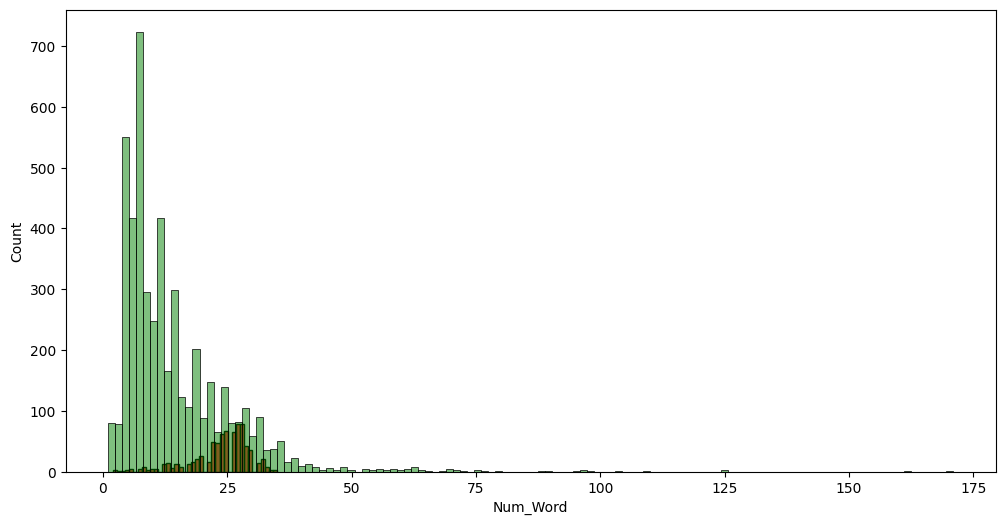

In [26]:
# Biểu đồ Histogram (phân bố tần suất) cho tin nhắn Spam và Không Spam
plt.figure(figsize=(12, 6))

# Biểu đồ cho các tin nhắn spam (màu đỏ)
sns.histplot(df[df['Label'] == 'spam']['Num_Word'], color='red', bins=40, label='Spam')

# Biểu đồ cho các tin nhắn không spam (màu xanh lá)
sns.histplot(df[df['Label'] == 'ham']['Num_Word'], color='green', alpha=0.5, label='Not Spam')

plt.show()


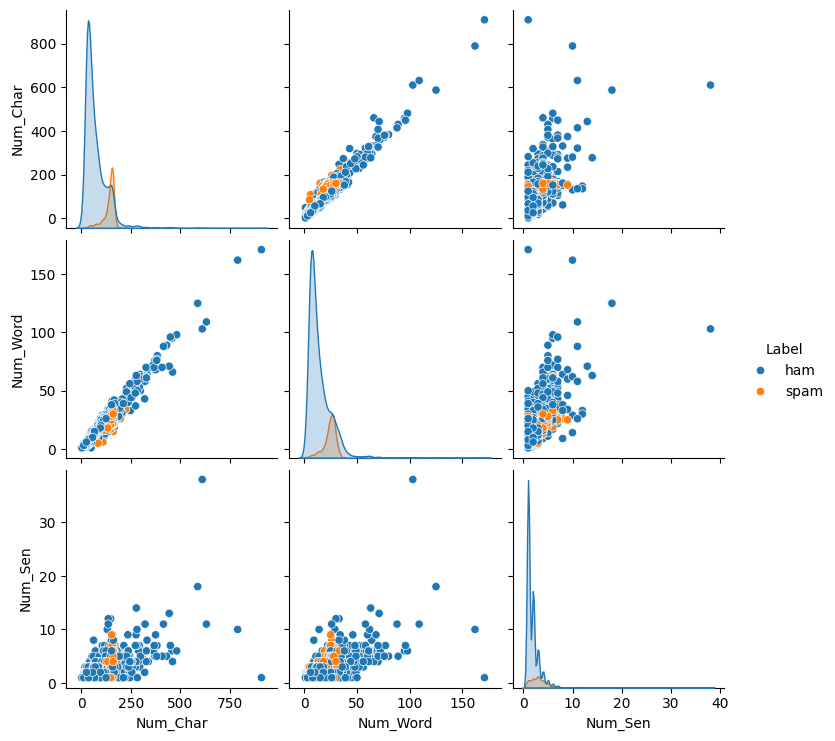

In [27]:
# Biểu đồ cặp (pair plot) để quan sát mối quan hệ giữa các đặc trưng
sns.pairplot(df.drop(columns=['Spam']), hue='Label')
plt.show()

In [28]:
# HANDLE OUTLIERS(XỬ LÍ CÁC NGOẠI LỆ)


# Loại bỏ một số giá trị ngoại lai (outliers) trong tập dữ liệu
i = df[df['Num_Char'] > 500].index  # Lấy chỉ số các hàng có số ký tự > 500
df.drop(i, axis=0, inplace=True)   # Xóa các hàng này khỏi DataFrame


# Đặt lại chỉ số (index) của DataFrame sau khi xóa hàng
df = df.reset_index()
# Xóa cột 'index' do reset_index tạo ra
df.drop("index", inplace=True, axis=1)


df



,Label,Message,Spam,Num_Char,Num_Word,Num_Sen
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20,2
1,ham,Ok lar... Joking wif u oni...,0,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,2
3,ham,U dun say so early hor... U c already then say...,0,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13,1
...,...,...,...,...,...,...
5561,spam,This is the 2nd time we have tried 2 contact u...,1,161,30,4
5562,ham,Will Ì_ b going to esplanade fr home?,0,37,8,1
5563,ham,"Pity, * was in mood for that. So...any other s...",0,57,10,2
5564,ham,The guy did some bitching but I acted like i'd...,0,125,26,1


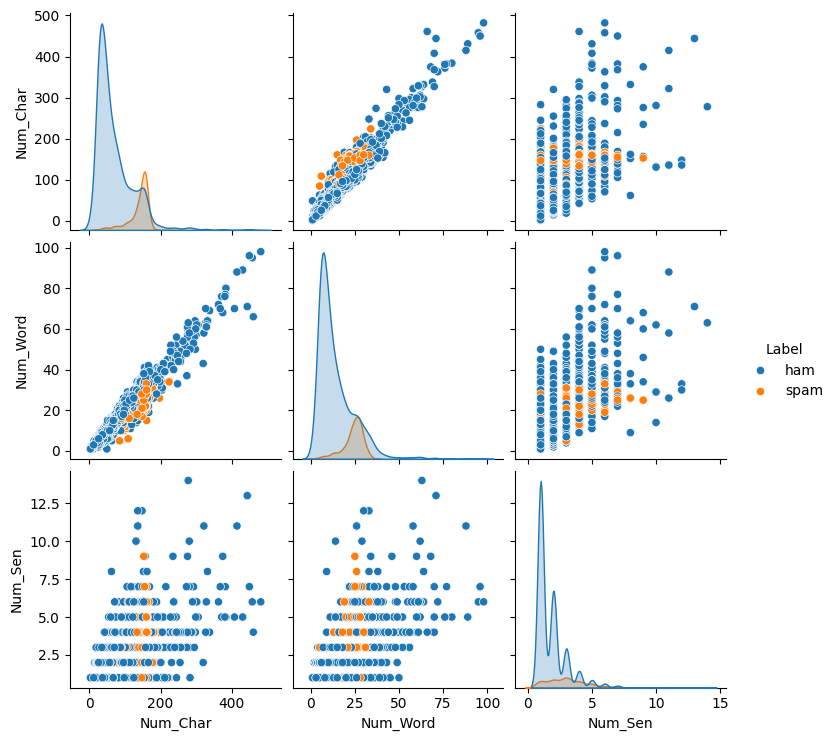

In [29]:
sns.pairplot(df.drop(columns=['Spam']), hue='Label')
plt.show()

# Data Cleaning


In [30]:
# Hàm làm sạch dữ liệu văn bản
def clean_text(text):
    # Loại bỏ thẻ HTML
    text = re.sub(r'<.*?>', '', text)

    # Loại bỏ các liên kết website
    text = re.sub(r"http\S+", '', text)

    # Loại bỏ các chữ số
    text = re.sub(r'\d+', '', text)

    # Loại bỏ email
    text = re.sub(r"\S*@\S*\s?", '', text)

    # Chuyển tất cả ký tự thành chữ thường
    text = text.lower()

    # Tokenize: tách văn bản thành các từ
    words = nltk.word_tokenize(text)

    # Giữ lại các từ chỉ gồm chữ cái (loại bỏ ký tự đặc biệt và số)
    words = [w for w in words if w.isalpha()]

    # Loại bỏ stopwords (từ dừng) tiếng Anh
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    # Lemmatization: đưa các từ về dạng gốc
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Nối các từ lại thành chuỗi văn bản
    text = ' '.join(words)

    return text


In [31]:
# Đo thời gian chạy của toàn bộ cell
%%time

# Kích hoạt tqdm cho pandas để hiển thị thanh tiến trình
tqdm.pandas()

# Áp dụng hàm clean_text cho cột 'Message' và lưu kết quả vào cột mới 'cleaned_text'
# progress_apply sẽ hiển thị thanh tiến trình khi xử lý từng dòng
df['cleaned_text'] = df['Message'].progress_apply(clean_text)


  0%|          | 0/5566 [00:00<?, ?it/s]

CPU times: user 5.65 s, sys: 232 ms, total: 5.88 s
Wall time: 6 s


In [32]:
# Tạo cột mới 'num_words_transform' đếm số từ trong văn bản đã được làm sạch
df['num_words_transform'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))


In [33]:
df

,Label,Message,Spam,Num_Char,Num_Word,Num_Sen,cleaned_text,num_words_transform
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20,2,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,0,29,6,2,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,2,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,0,49,11,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13,1,nah think go usf life around though,7
...,...,...,...,...,...,...,...,...
5561,spam,This is the 2nd time we have tried 2 contact u...,1,161,30,4,nd time tried contact u pound prize claim easy...,13
5562,ham,Will Ì_ b going to esplanade fr home?,0,37,8,1,b going esplanade fr home,5
5563,ham,"Pity, * was in mood for that. So...any other s...",0,57,10,2,pity mood suggestion,3
5564,ham,The guy did some bitching but I acted like i'd...,0,125,26,1,guy bitching acted like interested buying some...,13


# Word Count

In [34]:
# Nối tất cả các văn bản đã làm sạch thành một chuỗi duy nhất
all_text = ' '.join(df['cleaned_text'].values)


In [35]:
# Tách chuỗi văn bản lớn thành từng từ riêng lẻ
words = all_text.split()


In [36]:
# Đếm tần suất xuất hiện của từng từ
word_counts = Counter(words)

# Lấy 100 từ xuất hiện nhiều nhất
top_words = word_counts.most_common(100)

# Hiển thị kết quả
top_words


[('u', 1195),
 ('call', 605),
 ('get', 398),
 ('ur', 381),
 ('go', 305),
 ('gt', 294),
 ('lt', 292),
 ('free', 279),
 ('know', 270),
 ('day', 253),
 ('got', 250),
 ('come', 249),
 ('ok', 248),
 ('like', 245),
 ('time', 239),
 ('good', 239),
 ('text', 216),
 ('want', 213),
 ('love', 207),
 ('send', 191),
 ('one', 183),
 ('need', 178),
 ('today', 173),
 ('r', 172),
 ('going', 172),
 ('txt', 169),
 ('home', 163),
 ('lor', 162),
 ('sorry', 159),
 ('see', 158),
 ('still', 155),
 ('stop', 155),
 ('c', 154),
 ('back', 153),
 ('mobile', 151),
 ('da', 151),
 ('reply', 148),
 ('take', 148),
 ('think', 144),
 ('n', 143),
 ('tell', 141),
 ('phone', 140),
 ('dont', 138),
 ('new', 136),
 ('later', 134),
 ('hi', 132),
 ('week', 130),
 ('please', 130),
 ('pls', 125),
 ('make', 121),
 ('night', 121),
 ('dear', 121),
 ('k', 119),
 ('well', 117),
 ('say', 115),
 ('claim', 115),
 ('message', 115),
 ('great', 114),
 ('much', 112),
 ('thing', 111),
 ('oh', 110),
 ('hope', 110),
 ('wat', 107),
 ('number', 10

# Most Used Words in Spam Messages (Những từ được sử dụng nhiều nhất trong tin nhắn rác)

In [37]:
# Tạo danh sách chứa toàn bộ các từ xuất hiện trong những email bị gắn nhãn Spam
spam_corpus = []
for msg in df[df['Spam'] == 1]['cleaned_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Tạo danh sách chứa toàn bộ các từ xuất hiện trong những email Ham (không phải Spam)
ham_corpus = []
for msg in df[df['Spam'] == 0]['cleaned_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


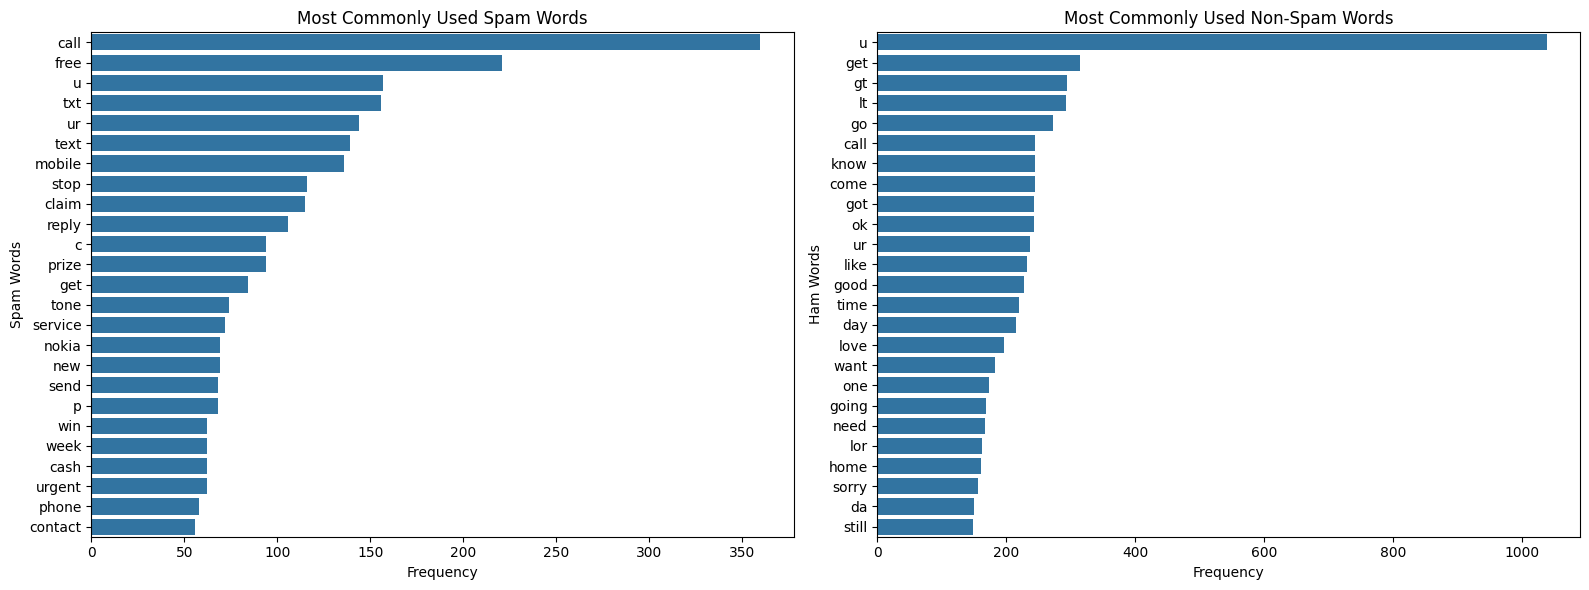

In [38]:
# Tạo một figure gồm 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Điều chỉnh độ rộng để các biểu đồ thoáng hơn

# Biểu đồ cột cho các từ trong nhóm Spam
sns.barplot(
    y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],
    x=pd.DataFrame(Counter(spam_corpus).most_common(25))[1],
    ax=axes[0]
)
axes[0].set_title("Most Commonly Used Spam Words") # Những từ xuất hiện nhiều nhất trong spam
axes[0].set_xlabel("Frequency") # Tần suất xuẩ hiện
axes[0].set_ylabel("Spam Words")

# Biểu đồ cột cho các từ trong nhóm Ham (Non-Spam)
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],
            x=pd.DataFrame(Counter(ham_corpus).most_common(25))[1],
            ax=axes[1])

axes[1].set_title("Most Commonly Used Non-Spam Words")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Ham Words")

# Display the plots
plt.tight_layout()  # Điều chỉnh bố cục để tránh chồng lấn
plt.show()

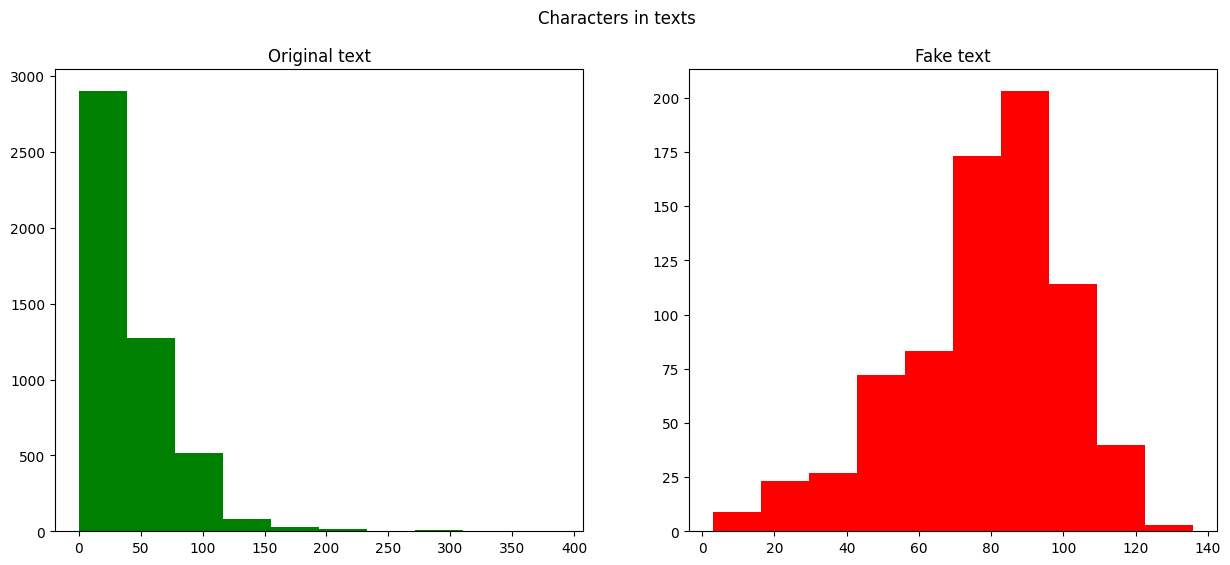

In [39]:
# Trực quan hóa độ dài ký tự của văn bản
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Độ dài ký tự của các văn bản không phải Spam (Ham)
text_len=df[df['Spam']==0]['cleaned_text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Original text') # Văn bản gốc (không phải spam)

# Độ dài ký tự của các văn bản Spam
text_len=df[df['Spam']==1]['cleaned_text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text') #Văn bản giả mạo

# Tiêu đề chung cho cả figure
fig.suptitle('Characters in texts') #số lượng kí tự

plt.show()


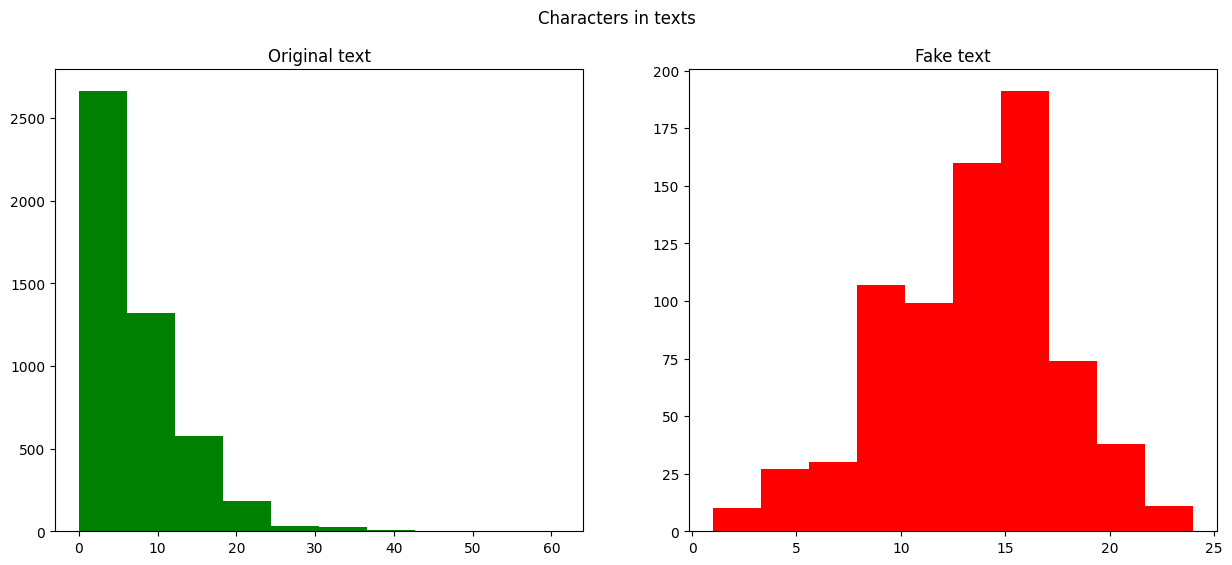

In [40]:
# Trực quan hóa số lượng từ trong văn bản
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Số lượng từ trong các văn bản không phải Spam (Ham)
text_len = df[df['Spam'] == 0]['num_words_transform']
ax1.hist(text_len, color='green')
ax1.set_title('Original text')

# Số lượng từ trong các văn bản Spam
text_len = df[df['Spam'] == 1]['num_words_transform']
ax2.hist(text_len, color='red')
ax2.set_title('Fake text')

# Tiêu đề chung cho toàn bộ figure
fig.suptitle('Characters in texts')

plt.show()


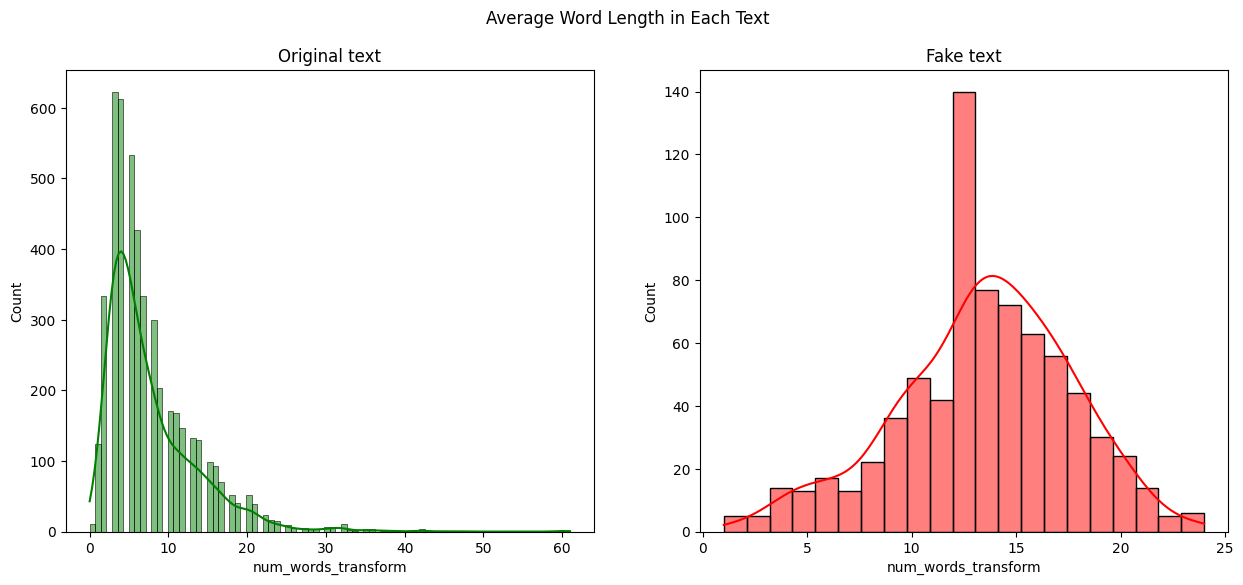

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Phân tích văn bản không phải spam
word = df[df['Spam'] == 0]['num_words_transform']
sns.histplot(word.map(lambda x: np.mean(x)), ax=ax1, color='green', kde=True)
ax1.set_title('Original text')

# Phân tích văn bản spam
word = df[df['Spam'] == 1]['num_words_transform']
sns.histplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red', kde=True)
ax2.set_title('Fake text')

# Tiêu đề chung
fig.suptitle('Average Word Length in Each Text') #Độ dài trung bình của từ trong văn bản

plt.show()


In [42]:
# Tách các tin nhắn Spam
df_spam = df[df['Label'] == 'spam'].copy()

# Tách các tin nhắn Ham (không phải Spam)
df_ham = df[df['Label'] == 'ham'].copy()


In [43]:
# Tạo WordCloud cho các tin nhắn Ham (không phải Spam)
comment_words_ham = ''
stop_words = set(STOPWORDS)

for val in df_ham.cleaned_text:
    val = str(val)
    tokens = val.split()
    tokens = [token.lower() for token in tokens]
    comment_words_ham += " ".join(tokens) + " "

wordcloud_ham = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stop_words,
    min_font_size=10,
    max_words=1000,
    colormap='gist_heat_r'
).generate(comment_words_ham)

# Tạo WordCloud cho các tin nhắn Spam
comment_words_spam = ''
for val in df_spam.cleaned_text:
    val = str(val)
    tokens = val.split()
    tokens = [token.lower() for token in tokens]
    comment_words_spam += " ".join(tokens) + " "

wordcloud_spam = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stop_words,
    min_font_size=10,
    max_words=1000,
    colormap='gist_heat_r'
).generate(comment_words_spam)


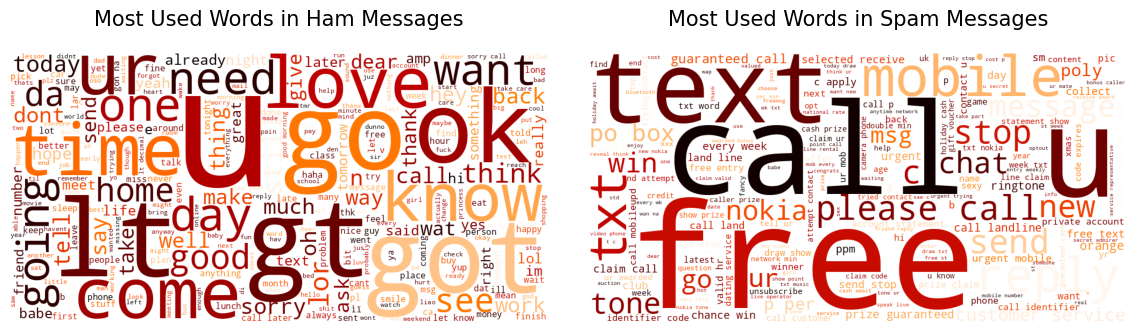

In [44]:
# Hiển thị cả hai biểu đồ trong cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 hàng, 2 cột
axes[0].imshow(wordcloud_ham)
axes[0].set_title('Most Used Words in Ham Messages', fontsize=15, pad=20)
axes[0].axis("off")

axes[1].imshow(wordcloud_spam)
axes[1].set_title('Most Used Words in Spam Messages', fontsize=15, pad=20)
axes[1].axis("off")

plt.tight_layout(pad=3)
plt.show()

# Splitting the Test and Train Data

In [45]:
# Chia dữ liệu thành tập huấn luyện (train set) và tập kiểm tra (test set)
train_set, test_set = train_test_split(df, test_size=0.25, random_state=42)

# In kích thước của từng tập
print(train_set.shape)
print(test_set.shape)

# In số bản ghi (records) và số đặc trưng (features) của từng tập
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],test_set.shape[1]))

(4174, 8)
(1392, 8)

The Trainset consists of 4174 records and 8 features

The Testset consists of 1392 records and 8 features


# Feature Extraction (Trích xuất đặc trưng)


In [46]:
# Tạo đối tượng TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(train_set['cleaned_text'])  # Huấn luyện vectorizer trên tập huấn luyện

# Biểu diễn dữ liệu văn bản dưới dạng vector TF-IDF
x_train_text = tfidf_vect.transform(train_set['cleaned_text'])  # Chuyển đổi tập huấn luyện
x_test_text = tfidf_vect.transform(test_set['cleaned_text'])    # Chuyển đổi tập kiểm tra



In [47]:
# Lưu mô hình TfidfVectorizer đã huấn luyện vào file để sử dụng sau
with open('tfidf_vect_model.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)


In [48]:
# Chuẩn hóa các đặc trưng số (Numeric Features)
scaler = MinMaxScaler()

# Danh sách các cột đặc trưng số
numeric_features = ['Num_Char', 'Num_Word', 'Num_Sen', 'num_words_transform']

# Chuẩn hóa dữ liệu tập huấn luyện về khoảng [0,1]
x_train_numeric = scaler.fit_transform(train_set[numeric_features])

# Chuẩn hóa dữ liệu tập kiểm tra dựa trên thông số đã học từ tập huấn luyện
x_test_numeric = scaler.transform(test_set[numeric_features])


In [49]:
# Lưu scaler
with open('scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [50]:
# Kết hợp các đặc trưng văn bản và đặc trưng số thành một ma trận đặc trưng chung
x_train_combined = hstack([x_train_text, x_train_numeric])
x_test_combined = hstack([x_test_text, x_test_numeric])


# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest

In [51]:
# Tạo từ điển để lưu trữ kết quả đánh giá các mô hình
predictions = {
    "Classifier": [],   # Tên bộ phân loại
    "Accuracy": [],     # Độ chính xác
    "Precision": [],    # Độ chính xác theo từng lớp (Precision)
    "Recall": [],       # Độ hồi hồi (Recall)
    "F1-score": []      # F1-score
}

# Tạo từ điển để lưu trữ kết quả đánh giá các mô hình sau khi tối ưu
predictionOptimizeds = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}


In [53]:
# Hàm để thêm các chỉ số đánh giá vào từ điển `predictions`
def add_metrics_to_predictions(model_name, y_true, y_pred):
    # Tạo báo cáo phân loại dưới dạng dict
    report = classification_report(y_true, y_pred, output_dict=True)

    # Lưu tên mô hình
    predictions["Classifier"].append(model_name)

    # Lưu các chỉ số Accuracy, Precision, Recall, F1-score
    predictions["Accuracy"].append(accuracy_score(y_true, y_pred))
    predictions["Precision"].append(report["1"]["precision"])  # Giả sử '1' là lớp dương (Spam)
    predictions["Recall"].append(report["1"]["recall"])
    predictions["F1-score"].append(report["1"]["f1-score"])

# Hàm để thêm các chỉ số đánh giá vào từ điển `predictionOptimizeds` sau khi tối ưu mô hình
def add_metrics_to_prediction_optimized(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)

    predictionOptimizeds["Classifier"].append(model_name)
    predictionOptimizeds["Accuracy"].append(accuracy_score(y_true, y_pred))
    predictionOptimizeds["Precision"].append(report["1"]["precision"])  # Giả sử '1' là lớp dương (Spam)
    predictionOptimizeds["Recall"].append(report["1"]["recall"])
    predictionOptimizeds["F1-score"].append(report["1"]["f1-score"])


# Naive Bayes classifier

In [54]:
# Tạo mô hình Naive Bayes cho dữ liệu đa biến
clf = MultinomialNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện kết hợp (văn bản + số liệu)
clf.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_NB = clf.predict(x_test_combined)

# Thêm các chỉ số đánh giá của mô hình vào từ điển `predictions`
add_metrics_to_predictions("Naive Bayes", test_set.Spam, predicted_values_NB)


In [55]:
# Tính độ chính xác
accuracy = accuracy_score(test_set.Spam, predicted_values_NB)


[[1201    0]
 [  62  129]]


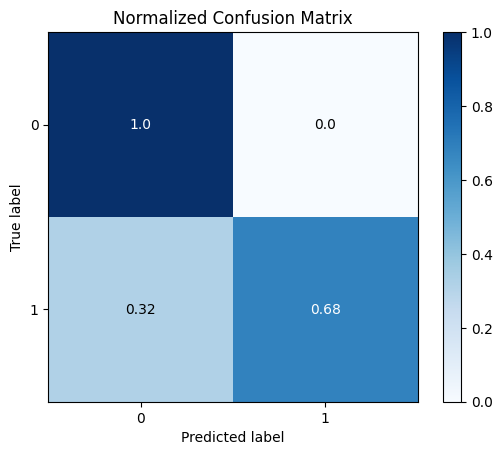

In [56]:
# Tạo ma trận nhầm lẫn (Confusion Matrix)
confusionmatrix = confusion_matrix(test_set.Spam, predicted_values_NB)
print(confusionmatrix)

# Vẽ ma trận nhầm lẫn dưới dạng trực quan hóa, với giá trị chuẩn hóa (tỷ lệ %)
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_NB, normalize=True)
plt.show()


In [59]:
# Tạo báo cáo phân loại (Classification Report)

report_NB = classification_report(test_set.Spam, predicted_values_NB)
print(report_NB)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1201
           1       1.00      0.68      0.81       191

    accuracy                           0.96      1392
   macro avg       0.98      0.84      0.89      1392
weighted avg       0.96      0.96      0.95      1392



In [60]:
# Lưu mô hình Naive Bayes đã huấn luyện
with open('clf_model.pkl', 'wb') as f:
    pickle.dump(clf, f)


# K-Nearest Neighbors algorithm

In [61]:
# Khởi tạo mô hình K-Nearest Neighbors (KNN)
# KNN = KNeighborsClassifier(metric='euclidean')  # Có thể chỉ định khoảng cách Euclidean
KNN = KNeighborsClassifier()

# Huấn luyện mô hình trên dữ liệu kết hợp (văn bản + số liệu)
KNN.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_KNN = KNN.predict(x_test_combined)

# Thêm các chỉ số đánh giá của mô hình vào từ điển `predictions`
add_metrics_to_predictions("K-Nearest Neighbors", test_set.Spam, predicted_values_KNN)

# Thêm các chỉ số đánh giá của mô hình vào từ điển `predictionOptimizeds`
add_metrics_to_prediction_optimized("K-Nearest Neighbors", test_set.Spam, predicted_values_KNN)


In [62]:
 accuracy = accuracy_score(test_set.Spam, predicted_values_KNN)


[[1201    0]
 [ 105   86]]


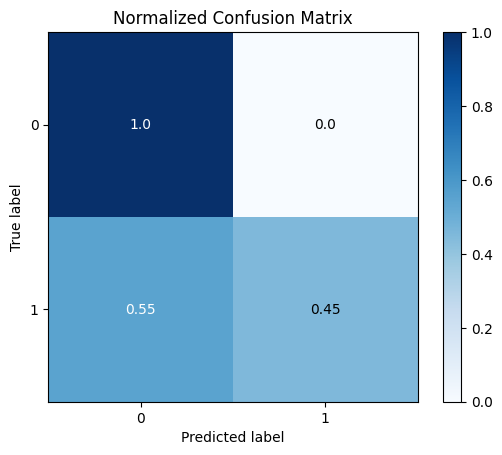

In [63]:
# Tạo ma trận nhầm lẫn (Confusion Matrix)
confusion_matrix_KNN = confusion_matrix(test_set.Spam, predicted_values_KNN)
print(confusion_matrix_KNN)

# Vẽ ma trận nhầm lẫn dưới dạng trực quan hóa, với giá trị chuẩn hóa (tỷ lệ %)
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_KNN, normalize=True)
plt.show()


In [64]:
# Tạo báo cáo phân loại (Classification Report)
report_KNN = classification_report(test_set.Spam, predicted_values_KNN)
print(report_KNN)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1201
           1       1.00      0.45      0.62       191

    accuracy                           0.92      1392
   macro avg       0.96      0.73      0.79      1392
weighted avg       0.93      0.92      0.91      1392



In [65]:
# Lưu mô hình K-Nearest Neighbors
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(KNN, f)


# Decision Tree

In [66]:
# Khởi tạo mô hình Decision Tree với random_state cố định để tái lập kết quả
DT = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên dữ liệu kết hợp (văn bản + số liệu)
DT.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_DT = DT.predict(x_test_combined)

# Thêm các chỉ số đánh giá của mô hình Decision Tree vào từ điển `predictions`
add_metrics_to_predictions("Decision Tree", test_set.Spam, predicted_values_DT)

In [67]:
accuracy = accuracy_score(test_set.Spam, predicted_values_DT)

[[1170   31]
 [  28  163]]


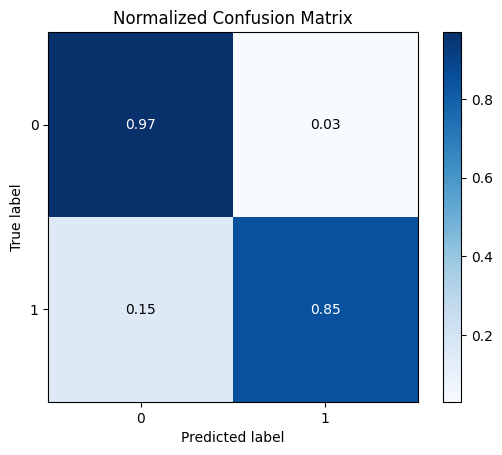

In [68]:
# Tạo ma trận nhầm lẫn (Confusion Matrix)
confusion_matrix_DT = confusion_matrix(test_set.Spam, predicted_values_DT)
print(confusion_matrix_DT)

# Vẽ ma trận nhầm lẫn dưới dạng trực quan hóa, với giá trị chuẩn hóa (tỷ lệ %)
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_DT, normalize=True)
plt.show()


In [69]:
report_DT = classification_report(test_set.Spam, predicted_values_DT)
print(report_DT)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1201
           1       0.84      0.85      0.85       191

    accuracy                           0.96      1392
   macro avg       0.91      0.91      0.91      1392
weighted avg       0.96      0.96      0.96      1392



In [70]:
# Lưu mô hình Decision Tree
with open('DT_model.pkl', 'wb') as f:
    pickle.dump(DT, f)


# Support Vector Machine (SVM)

In [71]:
# Khởi tạo mô hình Support Vector Machine (SVM) với xác suất dự đoán
SVM = svm.SVC(probability=True, random_state=42)

# Huấn luyện mô hình trên dữ liệu kết hợp (văn bản + số liệu)
SVM.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_SVM = SVM.predict(x_test_combined)

# Thêm các chỉ số đánh giá của mô hình SVM vào từ điển `predictions`
add_metrics_to_predictions("Support Vector Machine", test_set.Spam, predicted_values_SVM)


In [72]:
accuracy = accuracy_score(test_set.Spam, predicted_values_SVM)

[[1200    1]
 [  24  167]]


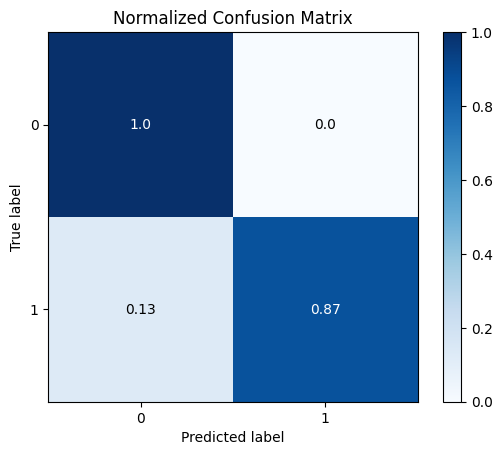

In [73]:
# Tạo ma trận nhầm lẫn (Confusion Matrix)
confusion_matrix_SVM = confusion_matrix(test_set.Spam, predicted_values_SVM)
print(confusion_matrix_SVM)

# Vẽ ma trận nhầm lẫn dưới dạng trực quan hóa, với giá trị chuẩn hóa (tỷ lệ %)
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_SVM, normalize=True)
plt.show()


In [74]:
report_SVM = classification_report(test_set.Spam, predicted_values_SVM)
print(report_SVM)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       0.99      0.87      0.93       191

    accuracy                           0.98      1392
   macro avg       0.99      0.94      0.96      1392
weighted avg       0.98      0.98      0.98      1392



In [75]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(SVM, f)

# Random Forest

In [76]:
# Khởi tạo mô hình Random Forest
RF = RandomForestClassifier(random_state=42)
# n_estimators - Số lượng cây trong rừng
# oob_score - Có sử dụng mẫu out-of-bag để ước lượng độ chính xác tổng quát hay không

# Huấn luyện mô hình trên dữ liệu kết hợp (văn bản + số liệu)
RF.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_RF = RF.predict(x_test_combined)

# Thêm các chỉ số đánh giá của mô hình Random Forest vào từ điển `predictions`
add_metrics_to_predictions("Random Forest", test_set.Spam, predicted_values_RF)


In [77]:
accuracy = accuracy_score(test_set.Spam, predicted_values_RF)

[[1199    2]
 [  32  159]]


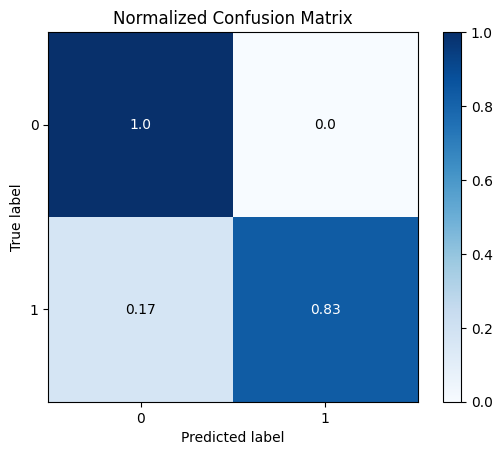

In [78]:
confusion_matrix_RF = confusion_matrix(test_set.Spam, predicted_values_RF)
print(confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_RF, normalize = True)
plt.show()

In [79]:
report_RF = classification_report(test_set.Spam, predicted_values_RF)
print(report_RF)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1201
           1       0.99      0.83      0.90       191

    accuracy                           0.98      1392
   macro avg       0.98      0.92      0.94      1392
weighted avg       0.98      0.98      0.97      1392



In [80]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(RF, f)

# Method Comparison(So sánh hiệu suất giữa các mô hình)

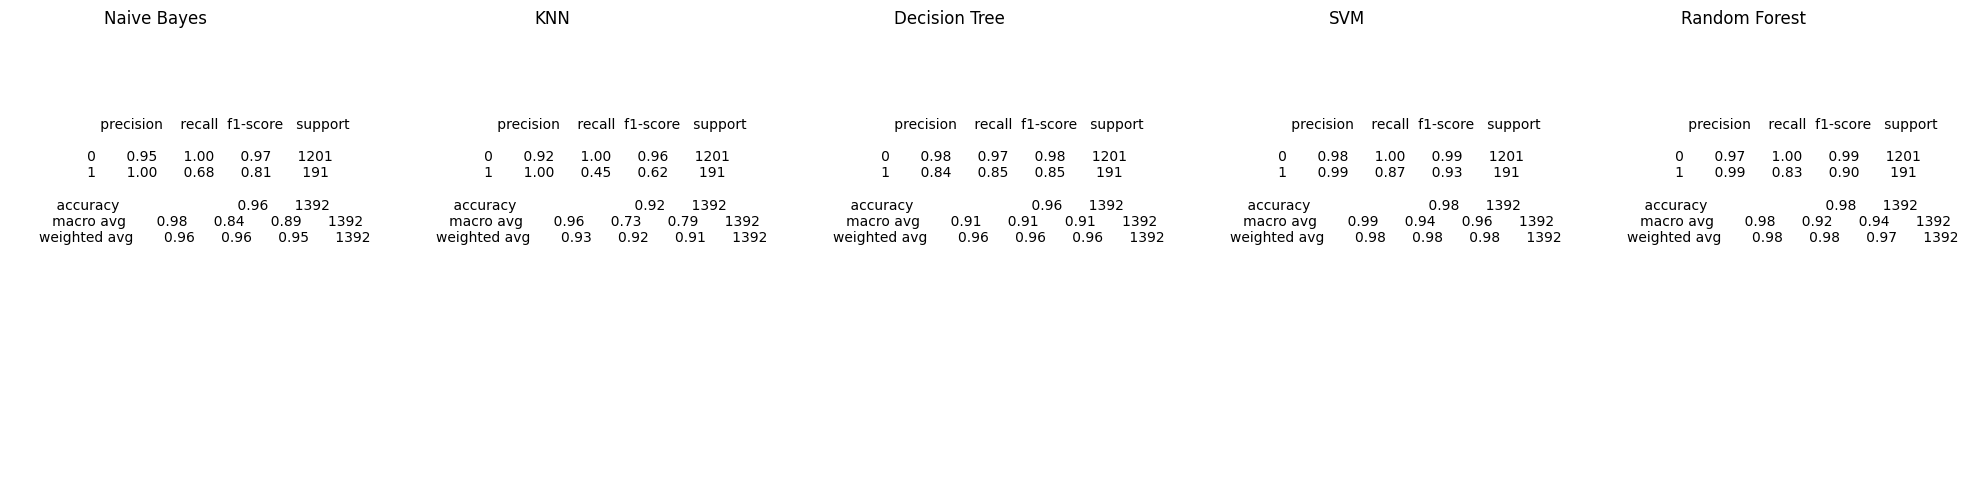

In [82]:
# Tạo báo cáo phân loại (Classification Report) cho từng mô hình
report_NB = classification_report(test_set.Spam, predicted_values_NB)
report_KNN = classification_report(test_set.Spam, predicted_values_KNN)
report_DT = classification_report(test_set.Spam, predicted_values_DT)
report_SVM = classification_report(test_set.Spam, predicted_values_SVM)
report_RF = classification_report(test_set.Spam, predicted_values_RF)

# Tạo hình với 1 hàng và 5 cột để hiển thị báo cáo
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

#báo cáo của mô hình Naive Bayes
axes[0].text(0.1, 0.5, report_NB, fontsize=10, wrap=True)
axes[0].set_title('Naive Bayes')
axes[0].axis('off')

#báo cáo của mô hình KNN
axes[1].text(0.1, 0.5, report_KNN, fontsize=10, wrap=True)
axes[1].set_title('KNN')
axes[1].axis('off')

#báo cáo của mô hình Decision Tree
axes[2].text(0.1, 0.5, report_DT, fontsize=10, wrap=True)
axes[2].set_title('Decision Tree')
axes[2].axis('off')

#báo cáo của mô hình SVM
axes[3].text(0.1, 0.5, report_SVM, fontsize=10, wrap=True)
axes[3].set_title('SVM')
axes[3].axis('off')

#báo cáo của mô hình Random Forest
axes[4].text(0.1, 0.5, report_RF, fontsize=10, wrap=True)
axes[4].set_title('Random Forest')
axes[4].axis('off')

# Điều chỉnh layout và hiển thị hình
plt.tight_layout()
plt.show()


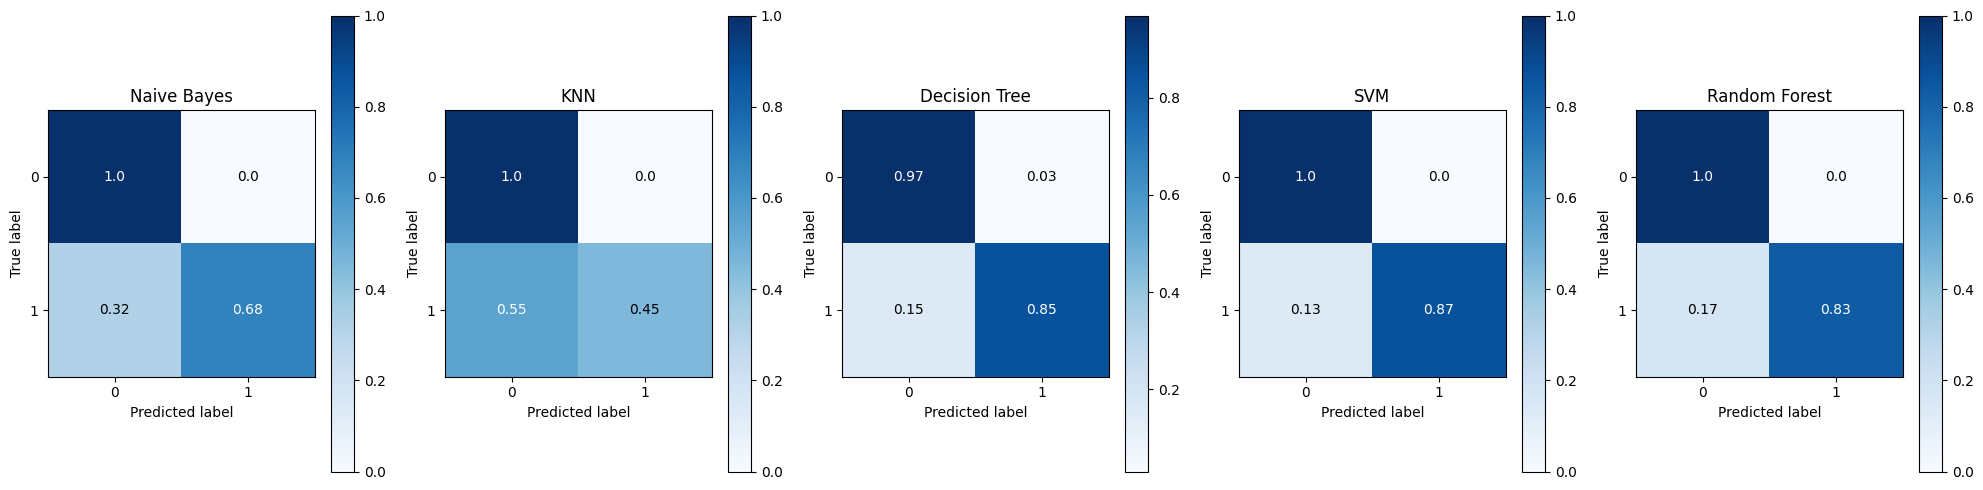

In [83]:
# Tạo hình với 1 hàng và 5 cột để hiển thị ma trận nhầm lẫn
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Vẽ ma trận nhầm lẫn cho các mô hình

# Naive Bayes
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_NB, normalize=True, ax=axes[0])
axes[0].set_title('Naive Bayes')

# KNN
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_KNN, normalize=True, ax=axes[1])
axes[1].set_title('KNN')

# Decision Tree
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_DT, normalize=True, ax=axes[2])
axes[2].set_title('Decision Tree')

# SVM
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_SVM, normalize=True, ax=axes[3])
axes[3].set_title('SVM')

# Random Forest
skplt.metrics.plot_confusion_matrix(test_set.Spam, predicted_values_RF, normalize=True, ax=axes[4])
axes[4].set_title('Random Forest')

# Điều chỉnh layout và hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()


In [84]:
# Chuyển từ điển `predictions` thành DataFrame để dễ xem
df = pd.DataFrame(predictions)

# In bảng kết quả dưới dạng Markdown, không hiển thị chỉ số dòng
print(df.to_markdown(index=False))


| Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
|:-----------------------|-----------:|------------:|---------:|-----------:|
| Naive Bayes            |   0.95546  |    1        | 0.675393 |   0.80625  |
| K-Nearest Neighbors    |   0.924569 |    1        | 0.450262 |   0.620939 |
| Decision Tree          |   0.957615 |    0.840206 | 0.853403 |   0.846753 |
| Support Vector Machine |   0.98204  |    0.994048 | 0.874346 |   0.930362 |
| Random Forest          |   0.975575 |    0.987578 | 0.832461 |   0.903409 |


In [85]:
# Khởi tạo các mô hình cơ bản
nb = MultinomialNB()
svm_ = svm.SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Tạo Voting Classifier (mô hình ensemble)
voting_clf = VotingClassifier(
    estimators=[
        ('Naive Bayes', nb),
        ('SVM', svm_),
        ('Decision Tree', decision_tree),
        ('Random Forest', rf)
    ],
    voting='soft',  # Dùng soft voting: tính trung bình xác suất dự đoán
    weights=[3, 1, 2, 1]  # Trọng số cho từng mô hình khi tính kết quả chung
)


In [86]:
# Huấn luyện Voting Classifier trên dữ liệu huấn luyện
voting_clf.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_voting = voting_clf.predict(x_test_combined)

# Đánh giá mô hình và lưu kết quả vào từ điển `predictions`
add_metrics_to_predictions("Voting Classifier", test_set.Spam, predicted_values_voting)


In [87]:
df = pd.DataFrame(predictions)

print(df.to_markdown(index=False))

| Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
|:-----------------------|-----------:|------------:|---------:|-----------:|
| Naive Bayes            |   0.95546  |    1        | 0.675393 |   0.80625  |
| K-Nearest Neighbors    |   0.924569 |    1        | 0.450262 |   0.620939 |
| Decision Tree          |   0.957615 |    0.840206 | 0.853403 |   0.846753 |
| Support Vector Machine |   0.98204  |    0.994048 | 0.874346 |   0.930362 |
| Random Forest          |   0.975575 |    0.987578 | 0.832461 |   0.903409 |
| Voting Classifier      |   0.977011 |    0.993789 | 0.837696 |   0.909091 |


#Optimize Model

In [88]:
# # Định nghĩa lưới tham số cho Naïve Bayes
# param_grid_nb = {
#     'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]  # Tham số Laplace smoothing
# }

# # GridSearchCV để tìm tham số tốt nhất
# nb_grid = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1)
# nb_grid.fit(x_train_combined, train_set['Spam'])

# # Lấy mô hình tốt nhất
# best_nb = nb_grid.best_estimator_
# print("Best Parameters:", nb_grid.best_params_)

# # Huấn luyện mô hình tốt nhất
# best_nb.fit(x_train_combined, train_set['Spam'])

# Khởi tạo và huấn luyện Naïve Bayes với alpha=0.1
best_nb = MultinomialNB(alpha=0.1)
best_nb.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_NB = best_nb.predict(x_test_combined)

# Lưu các chỉ số đánh giá vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Naive Bayes", test_set.Spam, predicted_values_NB)


In [91]:
# # Định nghĩa lưới tham số cho Decision Tree
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],  # Chọn hàm đo độ bất bình đẳng (impurity)
#     'max_depth': [None, 10, 20, 30],   # Độ sâu tối đa của cây
#     'min_samples_split': [2, 5, 10],   # Số mẫu tối thiểu để chia nhánh
#     'min_samples_leaf': [1, 2, 5]      # Số mẫu tối thiểu ở mỗi lá
# }

# # GridSearchCV để tìm tham số tốt nhất
# dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
# dt_grid.fit(x_train_combined, train_set['Spam'])

# # Lấy mô hình tốt nhất
# best_dt = dt_grid.best_estimator_
# print("Best Parameters:", dt_grid.best_params_)

# # Huấn luyện mô hình tốt nhất
# best_dt.fit(x_train_combined, train_set['Spam'])

# Khởi tạo và huấn luyện Decision Tree với các tham số tối ưu
best_dt = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2
)
best_dt.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_DT = best_dt.predict(x_test_combined)

# Lưu các chỉ số đánh giá vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Decision Tree", test_set.Spam, predicted_values_DT)
# # Định nghĩa lưới tham số cho Decision Tree
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],  # Chọn hàm đo độ bất bình đẳng (impurity)
#     'max_depth': [None, 10, 20, 30],   # Độ sâu tối đa của cây
#     'min_samples_split': [2, 5, 10],   # Số mẫu tối thiểu để chia nhánh
#     'min_samples_leaf': [1, 2, 5]      # Số mẫu tối thiểu ở mỗi lá
# }

# # GridSearchCV để tìm tham số tốt nhất
# dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
# dt_grid.fit(x_train_combined, train_set['Spam'])

# # Lấy mô hình tốt nhất
# best_dt = dt_grid.best_estimator_
# print("Best Parameters:", dt_grid.best_params_)

# # Huấn luyện mô hình tốt nhất
# best_dt.fit(x_train_combined, train_set['Spam'])

# Khởi tạo và huấn luyện Decision Tree với các tham số tối ưu
best_dt = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2
)
best_dt.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_DT = best_dt.predict(x_test_combined)

# Lưu các chỉ số đánh giá vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Decision Tree", test_set.Spam, predicted_values_DT)


In [92]:
# # Định nghĩa lưới tham số cho Random Forest
# param_grid = {
#     'n_estimators': [100, 300],          # Số cây trong rừng
#     'max_depth': [None, 10],             # Độ sâu tối đa của cây
#     'min_samples_split': [2, 5],         # Số mẫu tối thiểu để chia nhánh
#     'min_samples_leaf': [1, 2],          # Số mẫu tối thiểu ở mỗi lá
#     'class_weight': ['balanced']         # Cân bằng số lượng mẫu của các lớp
# }

# # GridSearchCV để tìm tham số tối ưu
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
# rf_grid.fit(x_train_combined, train_set['Spam'])

# # Lấy mô hình với các tham số tối ưu
# best_rf = rf_grid.best_estimator_
# print("Best Parameters:", rf_grid.best_params_)

# Khởi tạo và huấn luyện Random Forest với các tham số tối ưu
best_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100
)
best_rf.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_RF_1 = best_rf.predict(x_test_combined)

# Lưu các chỉ số đánh giá vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Random Forest", test_set.Spam, predicted_values_RF_1)


In [93]:
# # Định nghĩa lưới tham số cho SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],         # Giá trị lớn hơn giảm lỗi nhưng có thể overfit
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Chỉ áp dụng với kernel RBF hoặc Polynomial
#     'kernel': ['linear', 'rbf']     # Loại kernel
# }

# # GridSearchCV để tìm tham số tối ưu
# svm_grid = GridSearchCV(svm.SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')
# svm_grid.fit(x_train_combined, train_set['Spam'])

# # Lấy mô hình tốt nhất
# best_svm = svm_grid.best_estimator_
# print("Best Parameters:", svm_grid.best_params_)

# Khởi tạo và huấn luyện SVM với các tham số tối ưu
best_svm = svm.SVC(probability=True, random_state=42, C=1, gamma='scale', kernel='linear')
best_svm.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_SVM_1 = best_svm.predict(x_test_combined)

# Lưu các chỉ số đánh giá vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Support Vector Machine", test_set.Spam, predicted_values_SVM_1)


In [94]:
# Tạo Voting Classifier với các mô hình đã tối ưu
voting_clf_optimized = VotingClassifier(
    estimators=[
        ('Naive Bayes', best_nb),
        ('SVM', best_svm),
        ('Decision Tree', best_dt),
        ('Random Forest', best_rf)
    ],
    voting='soft',    # Dùng soft voting: tính trung bình xác suất dự đoán
    weights=[1, 1, 1, 1]  # Trọng số bằng nhau cho tất cả các mô hình
)


In [95]:
# Huấn luyện Voting Classifier tối ưu trên dữ liệu huấn luyện
voting_clf_optimized.fit(x_train_combined, train_set['Spam'])

# Dự đoán nhãn cho tập kiểm tra
predicted_values_voting_2 = voting_clf_optimized.predict(x_test_combined)

# Đánh giá mô hình và lưu kết quả vào bảng metrics tối ưu
add_metrics_to_prediction_optimized("Voting Classifier", test_set.Spam, predicted_values_voting_2)


In [96]:
df = pd.DataFrame(predictionOptimizeds)

print(df.to_markdown(index=False))

| Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
|:-----------------------|-----------:|------------:|---------:|-----------:|
| K-Nearest Neighbors    |   0.924569 |    1        | 0.450262 |   0.620939 |
| Naive Bayes            |   0.979885 |    0.960452 | 0.890052 |   0.923913 |
| Decision Tree          |   0.959052 |    0.856383 | 0.842932 |   0.849604 |
| Decision Tree          |   0.959052 |    0.856383 | 0.842932 |   0.849604 |
| Decision Tree          |   0.959052 |    0.856383 | 0.842932 |   0.849604 |
| Decision Tree          |   0.959052 |    0.856383 | 0.842932 |   0.849604 |
| Random Forest          |   0.978448 |    0.976331 | 0.863874 |   0.916667 |
| Support Vector Machine |   0.983477 |    0.982759 | 0.895288 |   0.936986 |
| Voting Classifier      |   0.985632 |    0.99422  | 0.900524 |   0.945055 |


In [97]:
with open('voting_model.pkl', 'wb') as f:
    pickle.dump(voting_clf_optimized, f)

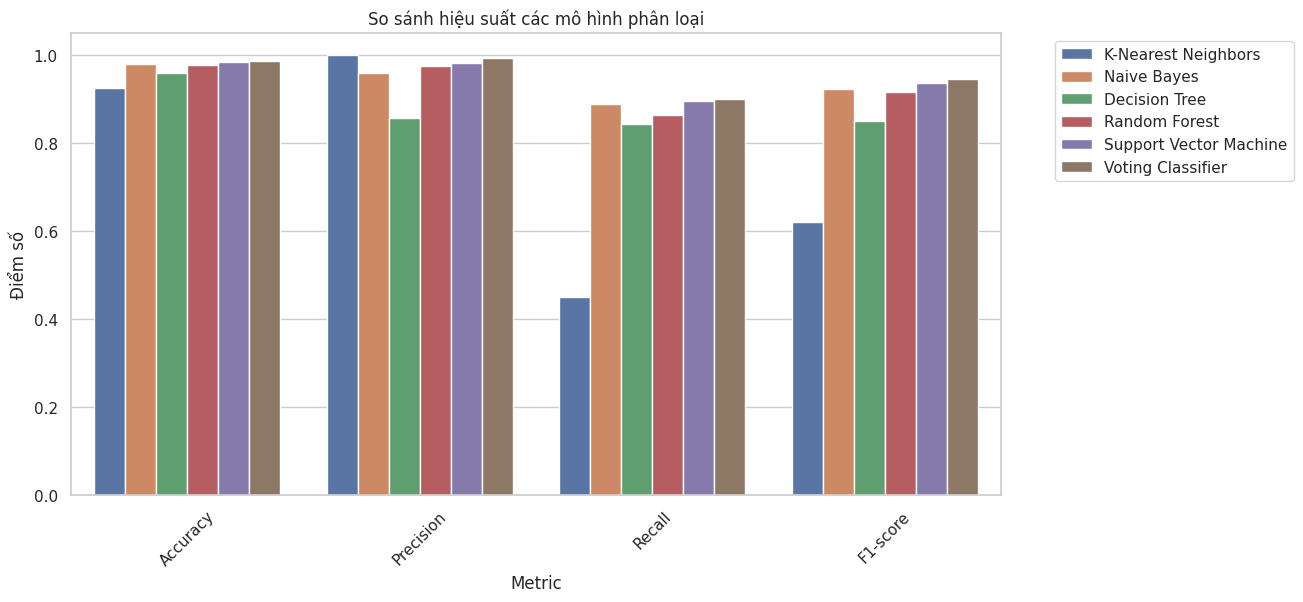

In [98]:
df_f = pd.DataFrame(predictionOptimizeds)

# Vẽ biểu đồ cột so sánh
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Sử dụng style 'whitegrid' của seaborn

# Chuyển DataFrame từ dạng rộng sang dạng dài để vẽ bằng seaborn
df_melted = df_f.melt(id_vars=["Classifier"], var_name="Metric", value_name="Value")

# Vẽ biểu đồ cột với trục x là các Metric, trục y là điểm số, phân biệt màu theo Classifier
sns.barplot(x="Metric", y="Value", hue="Classifier", data=df_melted)

# Thêm tiêu đề và nhãn
plt.title("So sánh hiệu suất các mô hình phân loại")
plt.ylabel("Điểm số")
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Đặt legend bên ngoài biểu đồ
plt.show()


In [99]:
def predict_message(message, model):
    # Tiền xử lý tin nhắn đầu vào
    cleaned_message = clean_text(message)

    # Load mô hình TfidfVectorizer từ file đã lưu
    with open('tfidf_vect_model.pkl', 'rb') as f:
        tfidf_vect = pickle.load(f)

    # Load mô hình MinMaxScaler từ file đã lưu
    with open('scaler_model.pkl', 'rb') as f:
        scaler = pickle.load(f)

    # Chuyển tin nhắn đã làm sạch thành vector số bằng TF-IDF
    message_vector = tfidf_vect.transform([cleaned_message])

    # Tính các đặc trưng bổ sung: số ký tự, số từ, số câu, số từ sau khi xử lý
    num_char = len(message)
    num_word = len(str(message).split())
    num_sen = len(nltk.sent_tokenize(message))
    num_words_transform = len(str(cleaned_message).split())

    # Chuyển các đặc trưng bổ sung thành dạng 2D array để phù hợp với mô hình
    additional_features = [[num_char, num_word, num_sen, num_words_transform]]

    # Chuẩn hóa các đặc trưng bổ sung bằng MinMaxScaler
    additional_features_scaled = scaler.fit_transform(additional_features)

    # Kết hợp vector TF-IDF với các đặc trưng số đã chuẩn hóa
    combined_features = hstack([message_vector, additional_features_scaled])

    # Dự đoán bằng mô hình đã huấn luyện
    prediction = model.predict(combined_features)

    # Trả về vector đặc trưng kết hợp và kết quả dự đoán
    return combined_features, prediction[0]


In [100]:
# Ví dụ tin nhắn cần dự đoán
message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr..."

# Load mô hình Voting Classifier đã huấn luyện từ file
with open('voting_model.pkl', 'rb') as f:
    VT = pickle.load(f)

# Dự đoán tin nhắn
features, prediction = predict_message(message, VT)

# Kiểm tra kết quả dự đoán
if prediction == 0:
    print("The message is Ham (not spam).")
else:
    print("The message is Spam.")


The message is Spam.


In [101]:
!pip install shap

In [102]:
import shap

In [103]:
features.shape

(1, 5847)

In [104]:
# Chuyển đổi thành dạng array để tính SHAP
sample_data = features.toarray()

# Tạo Explainer cho mô hình Naïve Bayes
explainer = shap.KernelExplainer(VT.predict_proba, sample_data)
# Lấy danh sách tên feature
feature_names = list(tfidf_vect.get_feature_names_out()) + numeric_features
# Tính SHAP values cho mẫu đầu tiên
shap_values = explainer.shap_values(sample_data)  # Chỉ lấy SHAP values cho 1 email

# Kiểm tra số lớp đầu ra
print(f"shap_values length: {len(shap_values)}")  # In ra để debug
print(f"shap_values[0] shape: {shap_values[0].shape}")

# Hiển thị SHAP force plot cho email đầu tiên
shap.initjs()

shap.force_plot(
    explainer.expected_value[1],  # Giá trị kỳ vọng của lớp Spam
    shap_values[0][:, 1],  # SHAP values của lớp Spam
    feature_names=feature_names
)

  0%|          | 0/1 [00:00<?, ?it/s]

shap_values length: 1
shap_values[0] shape: (5847, 2)


In [105]:
num_word_index = feature_names.index("Num_Word")
num_word_index

5844

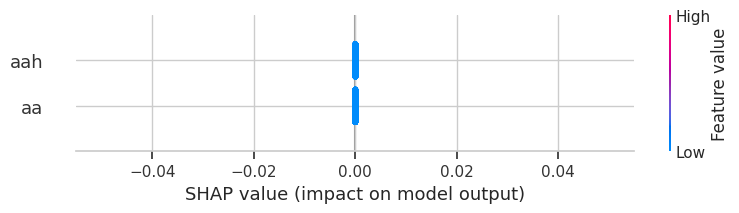

In [106]:
shap.summary_plot(shap_values[0], features=shap_values[0], feature_names=feature_names)

In [107]:
print(tfidf_vect.get_feature_names_out()[:50])

['aa' 'aah' 'aaooooright' 'aathi' 'ab' 'abbey' 'abel' 'aberdeen' 'abi'
 'ability' 'abiola' 'abj' 'able' 'abnormally' 'aboutas' 'abroad' 'absence'
 'absolutly' 'abstract' 'abt' 'abta' 'abuser' 'ac' 'academic' 'acc'
 'accent' 'accept' 'access' 'accessible' 'accidant' 'accident'
 'accidentally' 'accommodation' 'accommodationvouchers' 'accomodate'
 'accomodations' 'accordin' 'accordingly' 'account' 'accounting' 'achan'
 'ache' 'achieve' 'acid' 'acknowledgement' 'aclpm' 'acnt' 'aco' 'across'
 'act']


In [108]:
shap_matrix = shap_values[0]  # Lấy mảng numpy thực sự

free_index = feature_names.index("free")
win_index = feature_names.index("win")

print(f"SHAP value của 'free' (Ham class): {shap_matrix[free_index, 0]}")
print(f"SHAP value của 'free' (Spam class): {shap_matrix[free_index, 1]}")

print(f"SHAP value của 'win' (Ham class): {shap_matrix[win_index, 0]}")
print(f"SHAP value của 'win' (Spam class): {shap_matrix[win_index, 1]}")

SHAP value của 'free' (Ham class): 0.0
SHAP value của 'free' (Spam class): 0.0
SHAP value của 'win' (Ham class): 0.0
SHAP value của 'win' (Spam class): 0.0
